In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.drop("Exited", axis = 1)
y = dataset["Exited"]

In [ ]:
y.head()

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X.head()

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender',"Surname", "CustomerId", "RowNumber"],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling/Normalize=rupees, dollars=Same
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Importing the Keras libraries and packages
import keras # Main library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU # Activation fn
from keras.layers import Dropout 

Using TensorFlow backend.
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib

In [12]:
# Initialising the ANN
classifier = Sequential()

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [14]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [15]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [16]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
X.drop(["C"])

In [17]:

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/10
5359/5359 [==============================] - 2s 415us/step - loss: 0.5812 - accuracy: 0.7287 - val_loss: 0.4993 - val_accuracy: 0.7997
Epoch 2/10
5359/5359 [==============================] - 2s 282us/step - loss: 0.4809 - accuracy: 0.8033 - val_loss: 0.4708 - val_accuracy: 0.8008
Epoch 3/10
5359/5359 [==============================] - 2s 348us/step - loss: 0.4593 - accuracy: 0.8048 - val_loss: 0.4567 - val_accuracy: 0.8008
Epoch 4/10
5359/5359 [==============================] - 2s 399us/step - loss: 0.4456 - accuracy: 0.8084 - val_loss: 0.4485 - val_accuracy: 0.8008
Epoch 5/10
5359/5359 [==============================] - 2s 318us/step - loss: 0.4368 - accuracy: 0.8106 - val_loss: 0.4435 - val_accuracy: 0.8012
Epoch 6/10
5359/5359 [==============================] - 2s 319us/step - loss: 0.4311 - accuracy: 0.8112 - val_loss: 0.4406 - val_accuracy: 0.8016
Epoch 7/10
5359/5359 [==============================] - 2s 395us/step - los

In [18]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


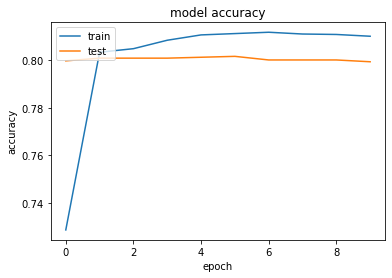

In [19]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1553,   42],
       [ 339,   66]], dtype=int64)

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
score

0.8095